# Gaussian Naive Bayes

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

array([0, 1, 0, 0, 1, 0, 0, 1])

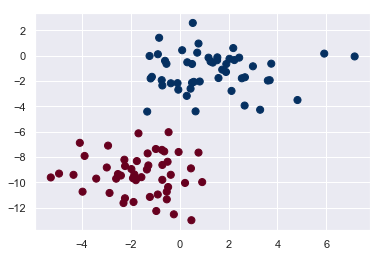

In [4]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);
z=model.predict(X)
z[-8:].round(2)

[(-15, 5), (-8, 8)]

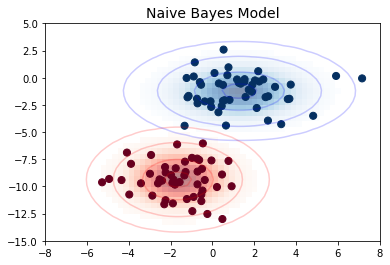

In [4]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X,y = make_blobs(100,2,centers = 2,random_state = 2,cluster_std =1.5)

fig,ax = plt.subplots()

ax.scatter(X[:,0], X[:,1],c=y,s=50,cmap='RdBu')
ax.set_title('Naive Bayes Model',size=14)

xlim = (-8,8)
ylim = (-15,5)

xg = np.linspace(xlim[0],xlim[1],60)
yg = np.linspace(ylim[0],ylim[1],40)
xx,yy = np.meshgrid(xg,yg)
Xgrid= np.vstack([xx.ravel(),yy.ravel()]).T


for label,color  in enumerate(['red','blue']):
    mask = (y==label)
    mu,std =X[mask].mean(0),X[mask].std(0)
    P = np.exp(-0.5*(Xgrid-mu)**2/std**2).prod(1)
    Pm = np.ma.masked_array(P,P<0.03)
    ax.pcolorfast(xg,yg,Pm.reshape(xx.shape),alpha=0.5, cmap =color.title()+'s')
    ax.contour(xx,yy,P.reshape(xx.shape), levels=[0.01,0.1,0.5,0.9],colors=color,alpha =0.2)
    
ax.set(xlim=xlim,ylim =ylim)    